In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model, decomposition, datasets
from sklearn import svm
import math
from sklearn import metrics

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9671713,City Square,RUSSELL STREET,Lt COLLINS STREET,COLLINS STREET,2,694E,16/07/2012 09:31:22 AM,16/07/2012 09:32:32 AM,70,1/2P MTR M-SAT 7:30-19:30,0,1221,523
3861428,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,1,C762,20/01/2012 09:45:14 AM,20/01/2012 10:00:44 AM,930,1P MTR M-SAT 7:30-19:30,0,1221,436
4215836,City Square,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,31/01/2012 11:14:26 AM,31/01/2012 11:22:19 AM,473,2P DIS M-SUN 0:00-23:59,0,669,1419
8146931,Rialto,KING STREET,BOURKE STREET,Lt COLLINS STREET,5,1447W,31/05/2012 10:12:46 AM,31/05/2012 10:13:51 AM,65,1/2P MTR M-F 10:00-16:00,0,839,5636
3996797,Hardware,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,4,2937S,24/01/2012 12:05:02 PM,24/01/2012 12:25:54 PM,1252,LZ 15M M-F 9:30-19:30,1,894,1841


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
4336620,The Mac,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,1,C6566,03/02/2012 11:51:33 AM,03/02/2012 12:48:01 PM,3388,1P MTR M-SAT 7:30-19:30,0,681,2810
10748406,County,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3284,17/08/2012 08:06:06 AM,17/08/2012 08:07:41 AM,95,1P MTR M-SAT 7:30-19:30,0,894,2092
8404152,Supreme,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3112,07/06/2012 03:56:03 PM,07/06/2012 04:23:06 PM,1623,1P MTR M-SAT 7:30-19:30,0,894,5684
5996080,Hyatt,FLINDERS LANE,EXHIBITION STREET,SPRING STREET,3,1732N,23/03/2012 07:30:00 PM,23/03/2012 07:43:54 PM,834,P MTR M-SAT 19:30-20:30,0,669,1473
11802642,Princes Theatre,EXHIBITION STREET,Lt BOURKE STREET,BOURKE STREET,1,C470,18/09/2012 12:41:55 PM,18/09/2012 12:43:10 PM,75,1P MTR M-SAT 7:30-19:30,0,647,380


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1006
Princes Theatre     741
Victoria Market     710
Southbank           666
Regency             610
The Mac             589
Hyatt               585
Titles              560
County              463
Rialto              453
Chinatown           417
Hardware            402
City Square         402
Spencer             398
Magistrates         367
Courtney            355
Banks               353
RACV                326
Jolimont            296
Supreme             200
Tavistock            58
Docklands            41
West Melbourne        2
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9671713,CITY SQUARE,RUSSELL STREET,LT COLLINS STREET,COLLINS STREET,2,694E,16/07/2012 09:31:22 AM,16/07/2012 09:32:32 AM,70,1/2P MTR M-SAT 7:30-19:30,0,1221,523
3861428,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,1,C762,20/01/2012 09:45:14 AM,20/01/2012 10:00:44 AM,930,1P MTR M-SAT 7:30-19:30,0,1221,436
4215836,CITY SQUARE,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,31/01/2012 11:14:26 AM,31/01/2012 11:22:19 AM,473,2P DIS M-SUN 0:00-23:59,0,669,1419
8146931,RIALTO,KING STREET,BOURKE STREET,LT COLLINS STREET,5,1447W,31/05/2012 10:12:46 AM,31/05/2012 10:13:51 AM,65,1/2P MTR M-F 10:00-16:00,0,839,5636
3996797,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,4,2937S,24/01/2012 12:05:02 PM,24/01/2012 12:25:54 PM,1252,LZ 15M M-F 9:30-19:30,1,894,1841


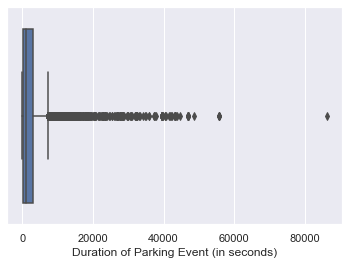

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             970
QUEEN STREET                762
COLLINS STREET              575
LA TROBE STREET             569
EXHIBITION STREET           547
FRANKLIN STREET             545
RUSSELL STREET              480
ELIZABETH STREET            442
BOURKE STREET               426
LT LONSDALE STREET          354
KING STREET                 275
LT COLLINS STREET           268
FLINDERS LANE               258
SPRING STREET               254
ERROL STREET                238
WILLIAM STREET              196
LT BOURKE STREET            181
COVENTRY STREET             169
VICTORIA STREET             157
A'BECKETT STREET            149
FLINDERS STREET             146
SPENCER STREET              133
QUEENSBERRY STREET          114
THERRY STREET               114
ALBERT STREET                97
CAPEL STREET                 96
GRANT STREET                 91
DORCAS STREET                88
LEVESON STREET               83
O'CONNELL STREET             79
KAVANAGH STREET              78
COBDEN S

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            929
QUEEN STREET           815
WILLIAM STREET         660
QUEENSBERRY STREET     616
RUSSELL STREET         603
SPENCER STREET         508
SWANSTON STREET        479
EXHIBITION STREET      421
LT LONSDALE STREET     400
LONSDALE STREET        388
LT COLLINS STREET      361
VICTORIA STREET        305
COLLINS STREET         296
BOURKE STREET          289
LT BOURKE STREET       264
ELIZABETH STREET       238
FLINDERS LANE          183
LA TROBE STREET        170
WELLS STREET           150
WILLAM STREET          140
FRANKLIN STREET        132
A'BECKETT STREET       120
THERRY STREET          110
SOUTHBANK BOULEVARD     98
ERROL STREET            89
DODDS STREET            88
O'CONNELL STREET        86
STURT STREET            83
FLINDERS STREET         75
KINGS WAY               73
BALSTON STREET          65
HOWARD STREET           63
COBDEN STREET           58
PELHAM STREET           55
GISBORNE STREET         53
ALBERT STREET           50
VICTORIA PARADE         48
P

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         876
ELIZABETH STREET       848
VICTORIA STREET        793
QUEEN STREET           791
EXHIBITION STREET      593
KING STREET            508
SPRING STREET          427
LONSDALE STREET        420
RUSSELL STREET         400
LT BOURKE STREET       388
FLINDERS LANE          371
COLLINS STREET         361
LT COLLINS STREET      289
BOURKE STREET          264
SWANSTON STREET        238
LA TROBE STREET        235
LT LONSDALE STREET     198
FLINDERS STREET        183
ST KILDA ROAD          150
DODDS STREET           137
FRANKLIN STREET        110
LANSDOWNE STREET       100
LEVESON STREET          89
QUEENSBERRY STREET      82
POWER STREET            82
THERRY STREET           74
A'BECKETT STREET        74
WALSH STREET            62
WELLS STREET            61
HAWKE STREET            57
CAPEL STREET            57
MILES STREET            46
STURT STREET            45
KAVANAGH STREET         43
ELM STREET              36
GRANT STREET            34
HOWARD STREET           33
D

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9671713,CITY SQUARE,RUSSELL STREET,LT COLLINS STREET,COLLINS STREET,2,694E,2012-07-16 09:31:22,2012-07-16 09:32:32,70,1/2P MTR M-SAT 7:30-19:30,0,1221,523
3861428,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,1,C762,2012-01-20 09:45:14,2012-01-20 10:00:44,930,1P MTR M-SAT 7:30-19:30,0,1221,436
4215836,CITY SQUARE,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,2012-01-31 11:14:26,2012-01-31 11:22:19,473,2P DIS M-SUN 0:00-23:59,0,669,1419
8146931,RIALTO,KING STREET,BOURKE STREET,LT COLLINS STREET,5,1447W,2012-05-31 10:12:46,2012-05-31 10:13:51,65,1/2P MTR M-F 10:00-16:00,0,839,5636
3996797,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,4,2937S,2012-01-24 12:05:02,2012-01-24 12:25:54,1252,LZ 15M M-F 9:30-19:30,1,894,1841


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
4336620,THE MAC,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,1,C6566,2012-03-02 11:51:33,2012-03-02 12:48:01,3388,1P MTR M-SAT 7:30-19:30,0,681,2810
10748406,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3284,2012-08-17 08:06:06,2012-08-17 08:07:41,95,1P MTR M-SAT 7:30-19:30,0,894,2092
8404152,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3112,2012-07-06 15:56:03,2012-07-06 16:23:06,1623,1P MTR M-SAT 7:30-19:30,0,894,5684
5996080,HYATT,FLINDERS LANE,EXHIBITION STREET,SPRING STREET,3,1732N,2012-03-23 19:30:00,2012-03-23 19:43:54,834,P MTR M-SAT 19:30-20:30,0,669,1473
11802642,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,1,C470,2012-09-18 12:41:55,2012-09-18 12:43:10,75,1P MTR M-SAT 7:30-19:30,0,647,380


### SVM Classification Model on Predicitive Analytics question 3

In [19]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

9671713    0
3861428    0
4215836    1
8146931    2
3996797    3
6646818    3
300377     4
2025525    1
7218104    5
5972102    1
Name: Street Name, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
9671713,0,0,0,0,0,2,70,1221,523,9,9
3861428,1,1,1,1,0,1,930,1221,436,9,10
4215836,0,2,2,2,0,4,473,669,1419,11,11
8146931,2,1,1,3,0,5,65,839,5636,10,10
3996797,3,3,3,4,1,4,1252,894,1841,12,12
6646818,4,4,4,5,0,1,2104,894,1934,8,8
300377,5,5,5,6,0,5,175,1329,3547,11,11
2025525,6,6,6,0,0,4,278,669,1468,16,16
7218104,7,7,7,7,0,1,273,798,3769,8,8
5972102,6,6,6,0,0,3,322,669,1471,11,11


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             'max_iter' : [100, 1000, 2500, 5000]}

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 1, 
                                    random_state = 1)
        

clf_GS = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = cv_method, verbose=True, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [23]:
#Fit the model with the dataset
best_clf = clf_GS.fit(features, target)
#LogisticRegression().get_params().keys()

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 86.1min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 111.0min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 138.7min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 1

In [24]:
clf_GS.best_params_

{'C': 0.0018329807108324356, 'gamma': 1, 'kernel': 'linear', 'max_iter': 5000}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0018329807108324356
Best max iteration: 5000
Best kernel: linear


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.1169
1,0.000100,1.000,rbf,1000,0.0970
2,0.000100,1.000,rbf,2500,0.0970
3,0.000100,1.000,rbf,5000,0.0970
4,0.000100,1.000,poly,100,0.0506
5,0.000100,1.000,poly,1000,0.1034
6,0.000100,1.000,poly,2500,0.1435
7,0.000100,1.000,poly,5000,0.1706
8,0.000100,1.000,sigmoid,100,0.0480
9,0.000100,1.000,sigmoid,1000,0.0970


In [27]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [28]:
# Hill climbing w/ SVM
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = SVM.fit(x_train, y_train)
    cur_Score = SVM.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.137


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Score with 2 selected features: 0.139


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Score with 3 selected features: 0.165


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Score with 4 selected features: 0.2345


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Score with 5 selected features: 0.9745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Score with 6 selected features: 0.9745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Score with 7 selected features: 0.9745

Indexs of the desired features
[2, 3, 1, 0, 7, 10, 5]


In [29]:
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,Between Street 1,Area Name,Street ID,Departure Hour,Side Of Street
9671713,0,0,0,0,1221,9,2
3861428,1,1,1,1,1221,10,1
4215836,2,2,2,0,669,11,4
8146931,1,3,1,2,839,10,5
3996797,3,4,3,3,894,12,4
6646818,4,5,4,4,894,8,1
300377,5,6,5,5,1329,11,5
2025525,6,0,6,6,669,16,4
7218104,7,7,7,7,798,8,1
5972102,6,0,6,6,669,11,3


In [30]:
bestModel = clf_GS.fit(features_hc, target)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 93.

In [31]:
clf_GS.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'poly', 'max_iter': 1000}

In [32]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0001
Best max iteration: 1000
Best kernel: poly


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.7162
1,0.000100,1.000,rbf,1000,0.0970
2,0.000100,1.000,rbf,2500,0.0970
3,0.000100,1.000,rbf,5000,0.0970
4,0.000100,1.000,poly,100,0.9965
5,0.000100,1.000,poly,1000,0.9988
6,0.000100,1.000,poly,2500,0.9988
7,0.000100,1.000,poly,5000,0.9988
8,0.000100,1.000,sigmoid,100,0.0480
9,0.000100,1.000,sigmoid,1000,0.0970


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
SVM.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = SVM.predict(x_test)
cm = metrics.confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Confusion Matrix
[[247   0   0 ...   0   0   0]
 [  0 127   0 ...   0   0   0]
 [  0   0 125 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0   3   0]
 [  0   0   0 ...   0   0   2]]


In [36]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       125
           3       1.00      1.00      1.00       486
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00       262
           9       1.00      1.00      1.00       391
          10       0.88      1.00      0.93        14
          11       1.00      0.99      0.99       176
          12       1.00      1.00      1.00       278
          13       1.00      1.00      1.00       301
          14       1.00      1.00      1.00       209
          15       0.99      1.00      1.00       208
          16       1.00      1.00      1.00       300
          17       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    SVM.fit(x_train, y_train)
    kFoldTotal += SVM.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, SVM.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nSVM mean score [5 folds] = " + str(roundedTotal))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 0] score: 0.99900


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 1] score: 0.99850


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 2] score: 0.99900


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 3] score: 0.99750


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 4] score: 0.99900

SVM mean score [5 folds] = 0.9986
